<a href="https://colab.research.google.com/github/tb-harris/neuroscience-2024/blob/main/04_Morphology_and_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset from hdf files

The *hdf* file format loads much faster than *csv* files.

In [3]:
import pandas as pd

cell_data = pd.read_hdf('/content/drive/Shareddrives/Lisman Laboratory/Lisman 2024/Neuro/Data/processed data/genes_morph.hdf5.lz4')

## Data setup

In [4]:
# Create dataframes with just the gene and morph data
gene_data = cell_data.iloc[:, :-24] # all rows, all columns from start until 25th-to-last
# Puts the last 25 cols into a morph_data dataframe
morph_data = cell_data.iloc[:, -24:] # all rows, all columns from 25-th-to-last to end

In [5]:
morph_data.columns # Gets all the morphological features

Index(['axon.total_length', 'all_neurites.total_length',
       'basal_dendrite.total_length', 'dendrite.total_length',
       'dendrite.total_surface_area', 'axon.total_surface_area',
       'all_neurites.total_surface_area', 'basal_dendrite.total_surface_area',
       'dendrite.total_volume', 'axon.total_volume',
       'all_neurites.total_volume', 'basal_dendrite.total_volume',
       'dendrite.num_tips', 'axon.num_tips', 'all_neurites.num_tips',
       'basal_dendrite.num_tips', 'dendrite.num_nodes', 'axon.num_nodes',
       'all_neurites.num_nodes', 'basal_dendrite.num_nodes',
       'dendrite.num_branches', 'axon.num_branches',
       'all_neurites.num_branches', 'basal_dendrite.num_branches'],
      dtype='object')

Let's take a closer look at one morphological feature: basal dendrite surface area

In [6]:
morph_data['basal_dendrite.total_surface_area'].describe()

count      573.000000
mean      5396.255328
std       1839.382995
min        778.515278
25%       4040.303824
50%       5167.077263
75%       6397.457770
max      16095.262050
Name: basal_dendrite.total_surface_area, dtype: float64

In [7]:
# get various percentiles
morph_data['basal_dendrite.total_surface_area'].quantile([0.5, 0.75, 0.9, 0.99])

0.50     5167.077263
0.75     6397.457770
0.90     7743.856171
0.99    11315.919597
Name: basal_dendrite.total_surface_area, dtype: float64

## Histograms

Seaborn histplot arguments:
* bins - Number of bins
* binwidth - Range of each bin (ie bin width of 50: 0-50, 50-100, etc)

set() arguments:
* xlabel, ylabel - Axis labels
* title - Graph title
* xlim, ylim - Lower and upper limits for numbers on x and y axes

[(0.0, 10000.0), Text(0.5, 0, 'Basal Dendrite SA (up to 10,000)')]

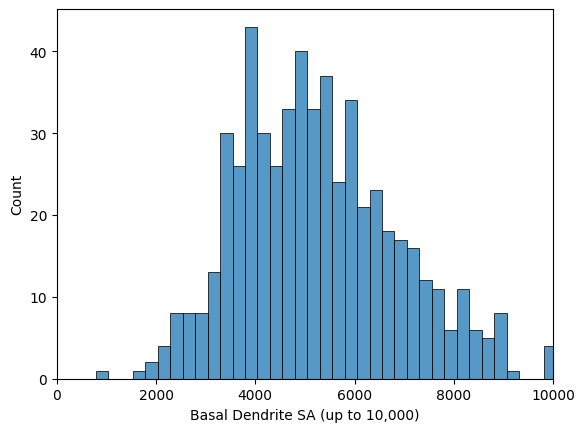

In [8]:
import seaborn as sns
sns.histplot(
    data=morph_data, x='basal_dendrite.total_surface_area', binwidth=250
).set(
    xlim=[0, 10000], xlabel="Basal Dendrite SA (up to 10,000)"
)

Observations:
* right-skewed
* outliers --> point of further investigation? transform the data before checking for correlation?
* somewhat symmetric apart from tail

## Analyze your own morphological feature
* Summary statistics
* Histogram (customize as needed)
* Bullet point analysis
* Box Plot if you finish

## Box plot

![Interpreting box plot](http://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_boxplots.jpg)

<Axes: ylabel='axon.total_length'>

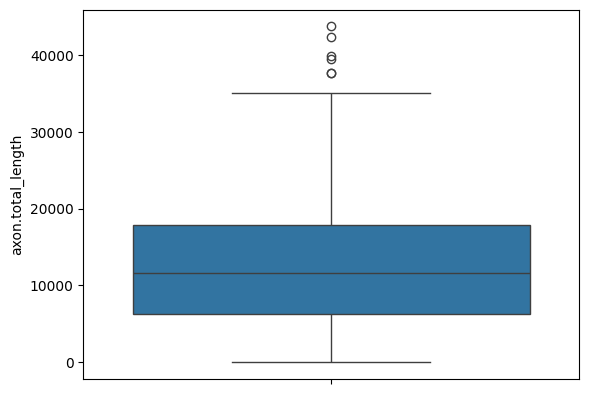

In [9]:
sns.boxplot(morph_data['axon.total_length'])

<Axes: >

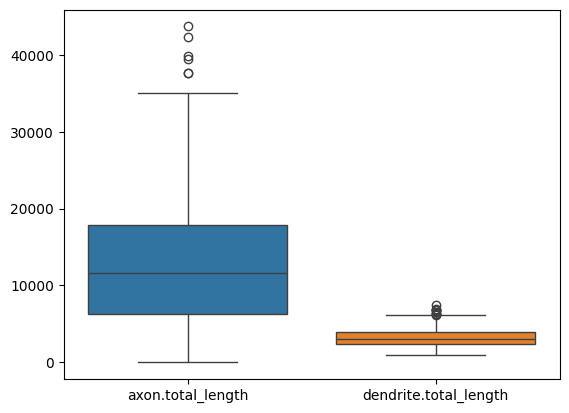

In [10]:
sns.boxplot([morph_data['axon.total_length'], morph_data['dendrite.total_length']])

## Violin plots
<img src="https://media.labxchange.org/xblocks/lb-LabXchange-46f64d7a-html-1/28__violin-plot-11626365603605-77f9e7acf0e79c553ec92a044b91b6b1.png" alt="Interpreting violin plots" height="400px">

<Axes: ylabel='axon.total_length'>

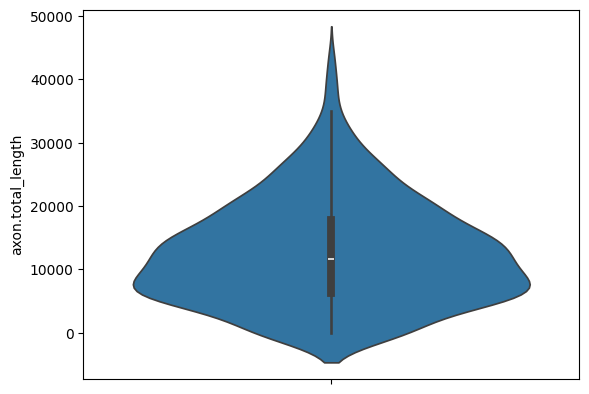

In [13]:
sns.violinplot(morph_data['axon.total_length'])

<Axes: >

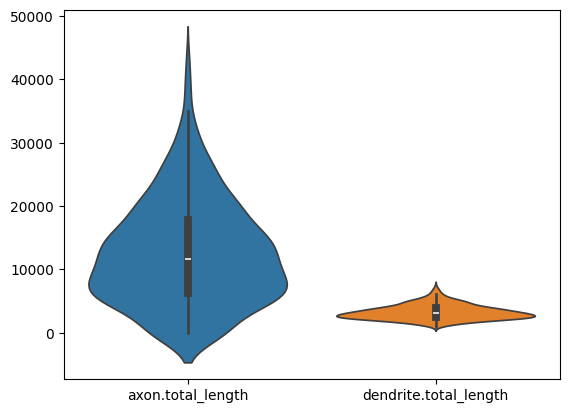

In [12]:
sns.violinplot([morph_data['axon.total_length'], morph_data['dendrite.total_length']])